<!-- Student -->
# Introduction to Computational Physics - Week 9 ##

<!-- Student -->
## Table of contents

Introduction to Computational Physics - Week 9: [>>](#Introduction-to-Computational-Physics---Week-9)  
-Table of contents: [>>](#Table-of-contents)  
-Introduction to week 9: [>>](#Introduction-to-week-9)  
-Numerical solution of equations using numpy: [>>](#Numerical-solution-of-equations-using-numpy)  
--Week 9 exercise 1: [>>](#Week-9-exercise-1)  
--Week 9 answer 1: [>>](#Week-9-answer-1)  
--Week 9 exercise 2: [>>](#Week-9-exercise-2)  
--Week 9 answer 2: [>>](#Week-9-answer-2)  
--Week 9 exercise 3: [>>](#Week-9-exercise-3)  
--Week 9 answer 3: [>>](#Week-9-answer-3)  
-Image analysis with numpy: [>>](#Image-analysis-with-numpy)  
--Week 9 exercise 4: [>>](#Week-9-exercise-4)  
--Week 9 answer 4: [>>](#Week-9-answer-4)  
-Week 9 marks: [>>](#Week-9-marks)  

<!-- Student -->
## Introduction to week 9

This week we will look at an example of how numpy arrays can be used to efficiently solve problems. We first show how manipulating arrays allows numerical solution of equations and then illustrate how the same technique can be used to find edges in images.

<!-- Student -->
## Numerical solution of an equation

Suppose we have a function $y(x)$ and we want to know the values of $x$ where it crosses a threshold value $T$, i.e. we want to solve the equation $y(x) = T$. We could do this by looking at a graph.

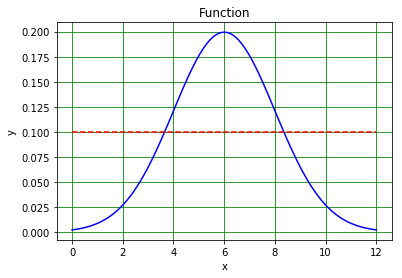

In [1]:
# <!-- Student -->
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
def gaussFunc(mu, sigma, x):
    g = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x - mu)**2/(2*sigma**2))
    return g
#
mu = 6.0
sigma = 2.0
#
thresh = 0.1
#
xMin = 0.0
xMax = 12.0
nArr = 120
xArr = np.linspace(xMin, xMax, nArr)
#
yArr = gaussFunc(mu, sigma, xArr)
#
plt.figure(figsize = (6, 4))
plt.title("Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, color = 'b', linestyle = '-')
plt.plot(xArr, thresh*np.ones(nArr), color = 'r', linestyle = '--')
plt.grid(color = 'g')
plt.show()

We could also use a `for` loop to workout where the function crosses the threshold.

Date and time  2019-03-25 15:38:14.382982
 
Number of solutions is 2
Values of x are
 [3.65 8.35]


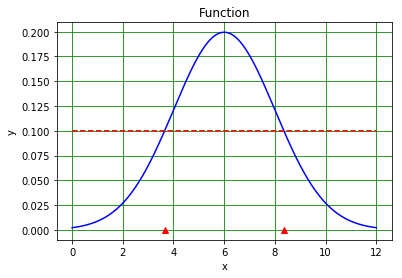

 
Date and time 2019-03-25 15:38:26.797465
Time since last check is 0:00:12.414483


In [2]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import sys
#
nArr = 12000000
xArr = np.linspace(xMin, xMax, nArr)
yArr = gaussFunc(mu, sigma, xArr)
#
maxSolns = 2
nSoln = 0
xSoln = np.zeros(maxSolns)
for n in range(1, nArr):
    if (yArr[n - 1] - thresh)*(yArr[n] - thresh) < 0.0:
        if nSoln > maxSolns - 1:
            print("Maximum number of solutions exceeded",sys.exit())
        xSoln[nSoln] = xArr[n - 1]
        nSoln += 1
    #
np.set_printoptions(precision = 3)
print(" ")
print("Number of solutions is",nSoln)
print("Values of x are\n",xSoln[0:nSoln])
#
plt.figure(figsize = (6, 4))
plt.title("Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, color = 'b', linestyle = '-')
plt.plot(xArr, thresh*np.ones(nArr), color = 'r', linestyle = '--')
plt.plot(xSoln[0:nSoln], np.zeros(nSoln), color = 'r', linestyle = '', marker = '^')
plt.grid(color = 'g')
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

<!-- Student -->
## Numerical solution of equation using numpy

Alsternatively, we could manipulate the array that contains the values of the function in the following way.

The first step is to make an array that is `True` where the function is above the threshold `thresh` and `False` otherwise. 

In [5]:
# <!-- Student -->
#
nArr = 12
xArr = np.linspace(xMin, xMax, nArr)
yArr = gaussFunc(mu, sigma, xArr)
LyArr = yArr > thresh
print("LyArr\n",LyArr)

LyArr
 [False False False False  True  True  True  True False False False False]


<!-- Student -->
We then make another version of this array in which all the elements are shifted to the left.

In [6]:
# <!-- Student -->
#
LyArrXL = np.zeros(nArr).astype(bool)
shiftX = 1
LyArrXL[0:nArr - shiftX] = LyArr[shiftX:nArr]
print("LyArr\n",LyArr)
print("LyArrXL\n",LyArrXL)

LyArr
 [False False False False  True  True  True  True False False False False]
LyArrXL
 [False False False  True  True  True  True False False False False False]


<!-- Student -->
Now we take the logical `not` of the first array. 

In [7]:
# <!-- Student -->
#
LyArrNot = np.logical_not(LyArr)
print("LyArrXL\n",LyArrXL)
print("LyArrNot\n",LyArrNot)

LyArrXL
 [False False False  True  True  True  True False False False False False]
LyArrNot
 [ True  True  True  True False False False False  True  True  True  True]


<!-- Student -->
Taking the logical `and` of `LyArrXL` and `LyArrNot`, we can determine the left-hand position in the array which corresponds to the place where the function crosses the threshold, as below.

In [8]:
# <!-- Student -->
#
boolThrL = np.logical_and(LyArrNot, LyArrXL)
print("boolThrL\n",boolThrL)

boolThrL
 [False False False  True False False False False False False False False]


<!-- Student -->
Hence we can get the left-hand $x$ value at which the function crosses the threshold.

In [9]:
# <!-- Student -->
#
xThrL = xArr[boolThrL]
print("xThrL =",xThrL)

xThrL = [3.273]


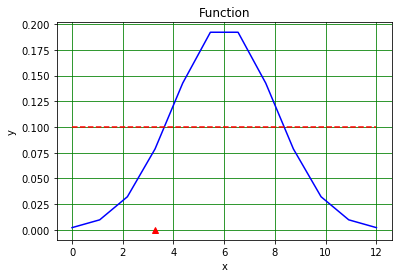

In [10]:
# <!-- Demo -->
#
plt.figure(figsize = (6, 4))
plt.title("Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, color = 'b', linestyle = '-')
plt.plot(xArr, thresh*np.ones(nArr), color = 'r', linestyle = '--')
plt.plot(xThrL, 0.0, color = 'r', linestyle = '', marker = '^')
plt.grid(color = 'g')
plt.show()

<!-- Demo -->
Adding determination of second solution (one of the exercises!) gives the following:

Date and time  2019-03-25 15:42:16.115907
 
Values of x are
 [3.65] [8.35]
 


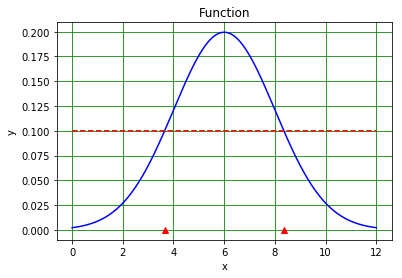

 
Date and time 2019-03-25 15:42:21.030992
Time since last check is 0:00:04.915085


In [11]:
# <!-- Demo -->
#
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
nArr = 12000000
xArr = np.linspace(xMin, xMax, nArr)
yArr = gaussFunc(mu, sigma, xArr)
#
LyArr = yArr > thresh
#
LyArrXL = np.zeros(nArr).astype(bool)
shiftX = 1
LyArrXL[0:nArr - shiftX] = LyArr[shiftX:nArr]
#
LyArrNot = np.logical_not(LyArr)
boolThrL = np.logical_and(LyArrNot, LyArrXL)
#
xThrL = xArr[boolThrL]
#
LyArrXLnot = np.logical_not(LyArrXL)
boolThrR = np.logical_and(LyArr, LyArrXLnot)
#
xThrR = xArr[boolThrR]
print(" ")
print("Values of x are\n",xThrL, xThrR)
print(" ")
#
plt.figure(figsize = (6, 4))
plt.title("Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, color = 'b', linestyle = '-')
plt.plot(xArr, thresh*np.ones(nArr), color = 'r', linestyle = '--')
plt.plot(xThrL, np.zeros(len(xThrL)), color = 'r', linestyle = '', marker = '^')
plt.plot(xThrR, np.zeros(len(xThrR)), color = 'r', linestyle = '', marker = '^')
plt.grid(color = 'g')
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Why should we use numpy rather than a `for` loop? Running the above two programs for a large number of iterations shows that the numpy solution is significantly faster. This is not a concern for problems like the above, but becomes important when working with larger data sets, for example when analysing images.

<!-- Student -->
## Image analysis with numpy

The technique used above can be used to identify elements of images, for example to outline the edges in the image of a telescope shown below. This example also illustrates how images can be read into Python programs. There is a large range of image analysis software available in the `scipy.ndimage` package. See [here](https://docs.scipy.org/doc/scipy/reference/ndimage.html) for more information!

Date and time  2019-03-25 15:44:23.358504
Number of rows 1064 of columns 684 of pixels 727776 and depth 3


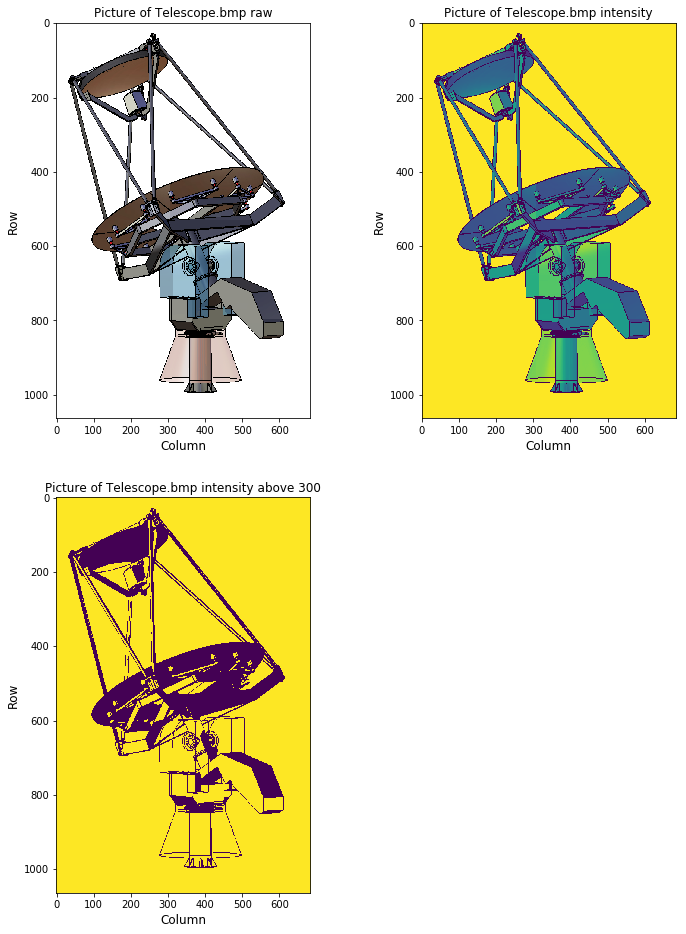

 
Date and time 2019-03-25 15:44:24.924291
Time since last check is 0:00:01.565787


In [12]:
# <!-- Student -->
#
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline
#
# Read in image
imFile = "Telescope.bmp"
#
imgRaw = plt.imread(imFile)
nRows = imgRaw.shape[0] # row corresponds to pixel's y coordinate
nCols = imgRaw.shape[1] # col corresponds to pixel's x ccordinate
nDepth = imgRaw.shape[2] # depth == 3 for red, blue green (RBG), == 4 for RBGA (A is alpha, i.e. transparency) 
img = np.zeros((nRows, nCols))
#img[0:nRows, 0:nCols] = imgRaw[0:nRows, 0:nCols, 0].astype(int) # Using depth [0] gives red
img[0:nRows, 0:nCols] = (imgRaw[0:nRows, 0:nCols, 0].astype(int) + 
                         imgRaw[0:nRows, 0:nCols, 1].astype(int) +
                         imgRaw[0:nRows, 0:nCols, 2].astype(int)) # Using depth [0 + 1 + 2] gives intensity
print("Number of rows",nRows,"of columns",nCols,"of pixels",nRows*nCols,"and depth",nDepth)
#
thresh = 300  # set threshold for finding edges
imgThr = np.zeros((nRows, nCols))
imgThr = img > thresh
#
fig = plt.figure(figsize=(12, 16))
thisplt = fig.add_subplot(2, 2, 1)
plt.title("Picture of " + imFile + " raw")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRaw)
#
thisplt = fig.add_subplot(2, 2, 2)
plt.title("Picture of " + imFile + " intensity")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(img)
#
thisplt = fig.add_subplot(2, 2, 3)
plt.title("Picture of " + imFile + " intensity above " + str(thresh))
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgThr)
#
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time 2019-03-25 15:47:03.486417
Min intensity in image 0.0 max intensity 765.0
nRows 1064 nCols 684
shiftR 2 shiftC 2
 
Date and time 2019-03-25 15:47:03.505397
Time since last check is 0:00:00.018980


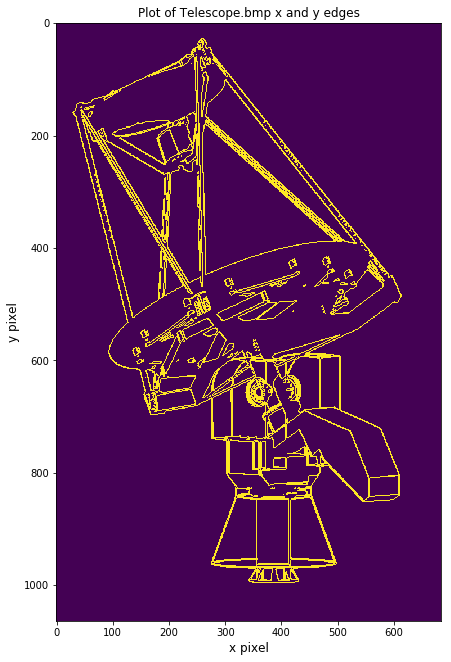

In [17]:
# <!-- Student -->
#
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
imgMin = np.amin(img)
imgMax = np.amax(img)
print("Min intensity in image",imgMin,"max intensity",imgMax)
#
shiftR = 2
shiftC = 2
print("nRows",nRows,"nCols",nCols)
print("shiftR",shiftR,"shiftC",shiftC)
imgEdge = np.full((nRows, nCols), False)
imgEdge[0:nRows - shiftR, 0:nCols - shiftC] = \
   np.logical_or(np.logical_or(np.logical_and(imgThr[0:nRows - shiftR, 0:nCols - shiftC], 
                                              np.logical_not(imgThr[0:nRows - shiftR, shiftC:nCols])),   # horizontal left
                               np.logical_and(np.logical_not(imgThr[0:nRows - shiftR, 0:nCols - shiftC]),
                                              imgThr[0:nRows - shiftR, shiftC:nCols])),                  # horizontal right
                 np.logical_or(np.logical_and(np.logical_not(imgThr[0:nRows - shiftR, 0:nCols - shiftC]), 
                                              imgThr[shiftR:nRows, 0:nCols - shiftC]),                   # vertical bottom
                               np.logical_and(imgThr[0:nRows - shiftR, 0:nCols - shiftC], 
                                              np.logical_not(imgThr[shiftR:nRows, 0:nCols - shiftC]))))  # vertical top
imgEdge[0:nRows, 0] = False
imgEdge[0, 0:nCols] = False
imgEdge[0:nRows, nCols - shiftC] = False
imgEdge[nRows - shiftR, 0:nCols] = False
#
fig = plt.figure(figsize=(7.0, 11.0))
plt.title("Plot of " +  imFile + " x and y edges", fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
plt.imshow(imgEdge)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))